# Stout Case Study #2: Customer Orders

In [151]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.read_csv("/content/drive/MyDrive/Stout/casestudy.csv",index_col=0)

In [10]:
df.head()

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015


- Total revenue for the current year

In [19]:
pd.DataFrame(df.groupby(['year'])['net_revenue'].agg('sum'))

,net_revenue
year,
2015,29036749.19
2016,25730943.59
2017,31417495.03


- Total Customers Current Year

In [79]:
pd.DataFrame(df.groupby("year").customer_email.count())

,customer_email
year,
2015,231294
2016,204646
2017,249987


- Total Customers Previous Year

In [83]:
pd.DataFrame(df.groupby("year").customer_email.count()).shift(1)

,customer_email
year,
2015,NaN
2016,231294.0
2017,204646.0


- New Customers

In [133]:
c2015 = df[df["year"]==2015]
c2016 = df[df["year"]==2016]
c2017 = df[df["year"]==2017]
new_2017=pd.merge(c2017, c2016, how='outer',on="customer_email",indicator=True).query('_merge == "left_only"').drop(columns=['_merge',"net_revenue_y","year_y"])
new_2016=pd.merge(c2016, c2015, how='outer',on="customer_email",indicator=True).query('_merge == "left_only"').drop(columns=['_merge',"net_revenue_y","year_y"])
new_customers=pd.concat([new_2017,new_2016],axis=0)
new_customers.columns=["customer_email","net_revenue","year"]
pd.DataFrame(new_customers["year"].value_counts())


,year
2017.0,229028
2016.0,145062


- New customers revenue

In [136]:
pd.DataFrame(new_customers.groupby("year")["net_revenue"].agg("sum"))

,net_revenue
year,
2016.0,18245491.01
2017.0,28776235.04


- Lost customers

In [137]:
lost_2017=pd.merge(c2016, c2017, how='outer',on="customer_email",indicator=True).query('_merge == "left_only"').drop(columns=['_merge',"net_revenue_y","year_y"])
lost_2016=pd.merge(c2015, c2016, how='outer',on="customer_email",indicator=True).query('_merge == "left_only"').drop(columns=['_merge',"net_revenue_y","year_y"])
lost_customers=pd.concat([new_2017,new_2016],axis=0)
lost_customers.columns=["customer_email","net_revenue","year"]
pd.DataFrame(lost_customers["year"].value_counts())


,year
2017.0,229028
2016.0,145062


- Revenue lost from attrition

In [138]:
pd.DataFrame(lost_customers.groupby("year")["net_revenue"].agg("sum"))

,net_revenue
year,
2016.0,18245491.01
2017.0,28776235.04


- Existing customer growth

In [145]:
pd.DataFrame(pd.DataFrame(df.groupby(['year'])['net_revenue'].agg('sum'))['net_revenue']-pd.DataFrame(df.groupby(['year'])['net_revenue'].agg('sum')).shift(1)['net_revenue'])

,net_revenue
year,
2015,NaN
2016,-3305805.60
2017,5686551.44


- Existing Customer Revenue Current Year 

In [147]:
pd.DataFrame(df.groupby("year").net_revenue.agg(sum))

,net_revenue
year,
2015,29036749.19
2016,25730943.59
2017,31417495.03


- Existing Customer Revenue Previous Year 

In [150]:
pd.DataFrame(df.groupby("year").net_revenue.agg(sum)).shift(1)

,net_revenue
year,
2015,NaN
2016,29036749.19
2017,25730943.59


- Some visualizations

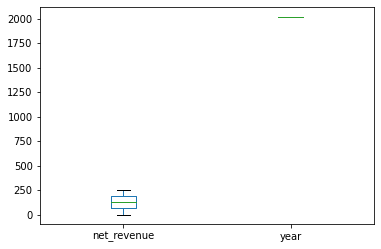

In [163]:
df.plot.box()

(array([0.00401286, 0.00399711, 0.00399225, 0.00402492, 0.00401392,
        0.00401889, 0.0040268 , 0.00403564, 0.00400824, 0.00403002]),
 array([  1. ,  25.9,  50.8,  75.7, 100.6, 125.5, 150.4, 175.3, 200.2,
        225.1, 250. ]),
 <a list of 10 Patch objects>)

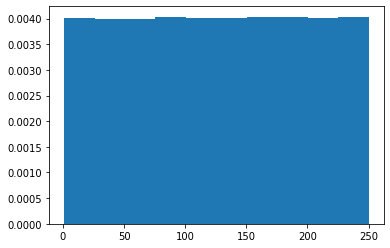

In [161]:
plt.hist(df["net_revenue"],density=True)

We can see here that the distribution of the net revenues is quite uniform.